# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [78]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from matplotlib.image import imread

%matplotlib inline

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [94]:
#image = 'fall_here.jpeg'
image = 'illusions_museum.jpeg'
image = imread(image)
original_shape = image.shape
original_shape

(972, 1296, 3)

In [109]:
original_shape[0]

972

Muestra la imagen para ver que se ha cargado bien

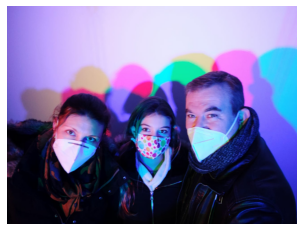

In [95]:
plt.axis('off')
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [96]:
image = image.reshape((image.shape[0] * image.shape[1]), image.shape[2])

In [97]:
image.shape

(1259712, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [123]:
clusters = 3

In [124]:
clt = KMeans(n_clusters= clusters)
clt.fit(image)

KMeans(n_clusters=3)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [125]:
clt.cluster_centers_

array([[215.72719396, 192.14030756, 243.55363942],
       [ 14.74144078,  13.13954626,  40.04507314],
       [ 98.68939734, 127.69511133, 214.91066587]])

In [126]:
clt.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [127]:
clt.inertia_

4139223086.248281

In [128]:
clt.n_iter_

5

In [129]:
new_image = np.full(shape=image.shape, fill_value= 0)


In [130]:
for i,x in enumerate(image):
    idx_center = clt.labels_[i]
    new_image[i] = clt.cluster_centers_[idx_center]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [131]:
new_image = new_image.reshape(original_shape)

In [132]:
new_image.shape

(972, 1296, 3)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

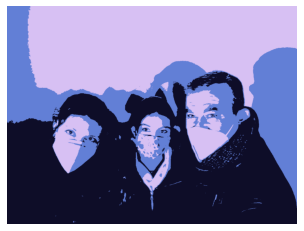

In [133]:
plt.axis('off')
plt.imshow(new_image);

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [111]:
def cluster_colors(name_image, clusters = 5):

    image = imread(name_image)

    #get original shape
    original_shape = image.shape

    #transform image to 2D
    flat_image = image.reshape((original_shape[0] *original_shape[1]),original_shape[2])

    #KMeans
    clt = KMeans(n_clusters= clusters)
    clt.fit(flat_image)

    #Create a new array by new_image
    new_image = np.full(shape=flat_image.shape, fill_value= 0)

    #replace 
    for i,x in enumerate(flat_image):
        idx_center = clt.labels_[i]
        new_image[i] = clt.cluster_centers_[idx_center]
    
    #Reshape to original_shape
    new_image = new_image.reshape(original_shape)

    #Show a original image and the new_image
    plt.axis('off')
    plt.imshow(image);
    plt.title('Original photo')
    plt.show();

    plt.axis('off')
    plt.imshow(new_image);
    plt.title(f'New photo with {clusters} colors')
    plt.show();

    return new_image

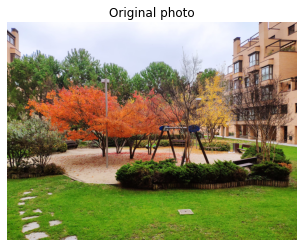

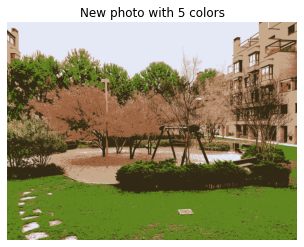

array([[[229, 233, 246],
        [229, 233, 246],
        [229, 233, 246],
        ...,
        [198, 168, 139],
        [198, 168, 139],
        [198, 168, 139]],

       [[229, 233, 246],
        [229, 233, 246],
        [229, 233, 246],
        ...,
        [198, 168, 139],
        [198, 168, 139],
        [198, 168, 139]],

       [[229, 233, 246],
        [229, 233, 246],
        [229, 233, 246],
        ...,
        [198, 168, 139],
        [158, 101,  66],
        [158, 101,  66]],

       ...,

       [[ 97, 134,  31],
        [ 97, 134,  31],
        [ 97, 134,  31],
        ...,
        [ 97, 134,  31],
        [ 97, 134,  31],
        [ 97, 134,  31]],

       [[ 97, 134,  31],
        [ 97, 134,  31],
        [ 97, 134,  31],
        ...,
        [ 97, 134,  31],
        [ 97, 134,  31],
        [ 97, 134,  31]],

       [[ 97, 134,  31],
        [ 97, 134,  31],
        [ 97, 134,  31],
        ...,
        [ 97, 134,  31],
        [ 97, 134,  31],
        [ 97, 134,  31]]

In [122]:
cluster_colors('fall_here.jpeg', clusters = 4)